In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path

In [2]:
# Remember that wcword is different from word or token in usual sense! 
!man wc|grep -A 2 -B 1 "A word is"

       Print newline, word, and byte counts for each FILE, and a total line if
       more than one FILE is specified.  A word is a non-zero-length  sequence
       of characters delimited by white space.



# Load data

In [3]:
def load_lang_stat(stats_dir):
    df = pd.read_csv(Path(stats_dir)/'stats.tsv', sep='\t')
    df['part'] = str(stats_dir)
    return df

ldf = pd.concat((load_lang_stat(d) 
                 for d in Path('.').glob('*stats')
                ), ignore_index=True)
ldf

,lang,text_newlines,text_wcwords,text_bytes,docs,part
0,aa,474692,1504184,11398297,7135,cc40_filtered_stats
1,ab,1438388,2066098,89235960,17247,cc40_filtered_stats
2,af,43792503,260523405,1771209454,253866,cc40_filtered_stats
3,ak,261875,1200086,7789683,3541,cc40_filtered_stats
4,am,19708152,49403677,1204538584,117045,cc40_filtered_stats
...,...,...,...,...,...,...
649,za,35728,246912,1930274,2215,wide00017_filtered_stats
650,zh,299648711157,724379653709,17511785784081,4038877747,wide00017_filtered_stats
651,zh-Hant,36914552237,58933578248,1951423911966,327533068,wide00017_filtered_stats
652,zu,2187105,8422016,64336167,13488,wide00017_filtered_stats


In [4]:
linf = pd.read_csv('./_langs/code2name_cld2.tsv', sep='\t')
linf

,Code,Name
0,aa,afar
1,ab,abkhazian
2,af,afrikaans
3,ak,akan
4,am,amharic
...,...,...
165,za,zhuang
166,zh,chinese
167,zh-Hant,chineset
168,zu,zulu


In [5]:
ldf = ldf.merge(linf, how='left',left_on='lang',right_on='Code')
ldf[ldf['Name'].isnull()]

,lang,text_newlines,text_wcwords,text_bytes,docs,part,Code,Name
156,xx-Avst,208,544,6530,8,cc40_filtered_stats,NaN,NaN
157,xx-Bali,14093,29011,764870,194,cc40_filtered_stats,NaN,NaN
158,xx-Bamu,5116,4279,70872,25,cc40_filtered_stats,NaN,NaN
159,xx-Batk,198,250,2158,2,cc40_filtered_stats,NaN,NaN
160,xx-Bopo,42023,160141,2059336,940,cc40_filtered_stats,NaN,NaN
...,...,...,...,...,...,...,...,...
642,xx-Ugar,59,140,837,1,wide00017_filtered_stats,NaN,NaN
643,xx-Vaii,365,427,2018,1,wide00017_filtered_stats,NaN,NaN
644,xx-Xpeo,93,165,1024,1,wide00017_filtered_stats,NaN,NaN
645,xx-Xsux,10538,12125,85340,9,wide00017_filtered_stats,NaN,NaN


In [6]:
ldf.sample(10)

,lang,text_newlines,text_wcwords,text_bytes,docs,part,Code,Name
27,dv,4064032,5154109,316994663,50101,cc40_filtered_stats,dv,dhivehi
0,aa,474692,1504184,11398297,7135,cc40_filtered_stats,aa,afar
539,ps,30165791,139781104,1117237639,120090,wide00017_filtered_stats,ps,pashto
274,ie,9461797,47904114,342810100,53611,wide00015_filtered_stats,ie,interlingue
451,ceb,7067728,32212418,198383457,28825,wide00017_filtered_stats,ceb,cebuano
239,crs,2044416,8616090,57349165,11256,wide00015_filtered_stats,crs,seselwa
205,xx-Ugar,360,568,5711,8,cc40_filtered_stats,NaN,NaN
589,xx-Bali,161,236,1215,1,wide00017_filtered_stats,NaN,NaN
226,ba,2722943,16384390,319947489,18008,wide00015_filtered_stats,ba,bashkir
615,xx-Merc,265,538,3351,2,wide00017_filtered_stats,NaN,NaN


In [7]:
def plot_langs(ldf, lang_col='lang-descr', stat_col='text_bytes', part_col='part', height=30, aspect=0.3, 
               logscale=True, xticks=[10**i for i in range(0,15)]):
    my_plot=sns.catplot(kind='bar',data=ldf, y=lang_col, x=stat_col, hue=part_col,
                        palette='Set2',height=height, aspect=aspect)
    if logscale:
        plt.xscale('log')

    sns.set_theme(font = 'monospace')
    # _=plt.xticks(rotation=90)
    _=plt.xticks(ticks=xticks)

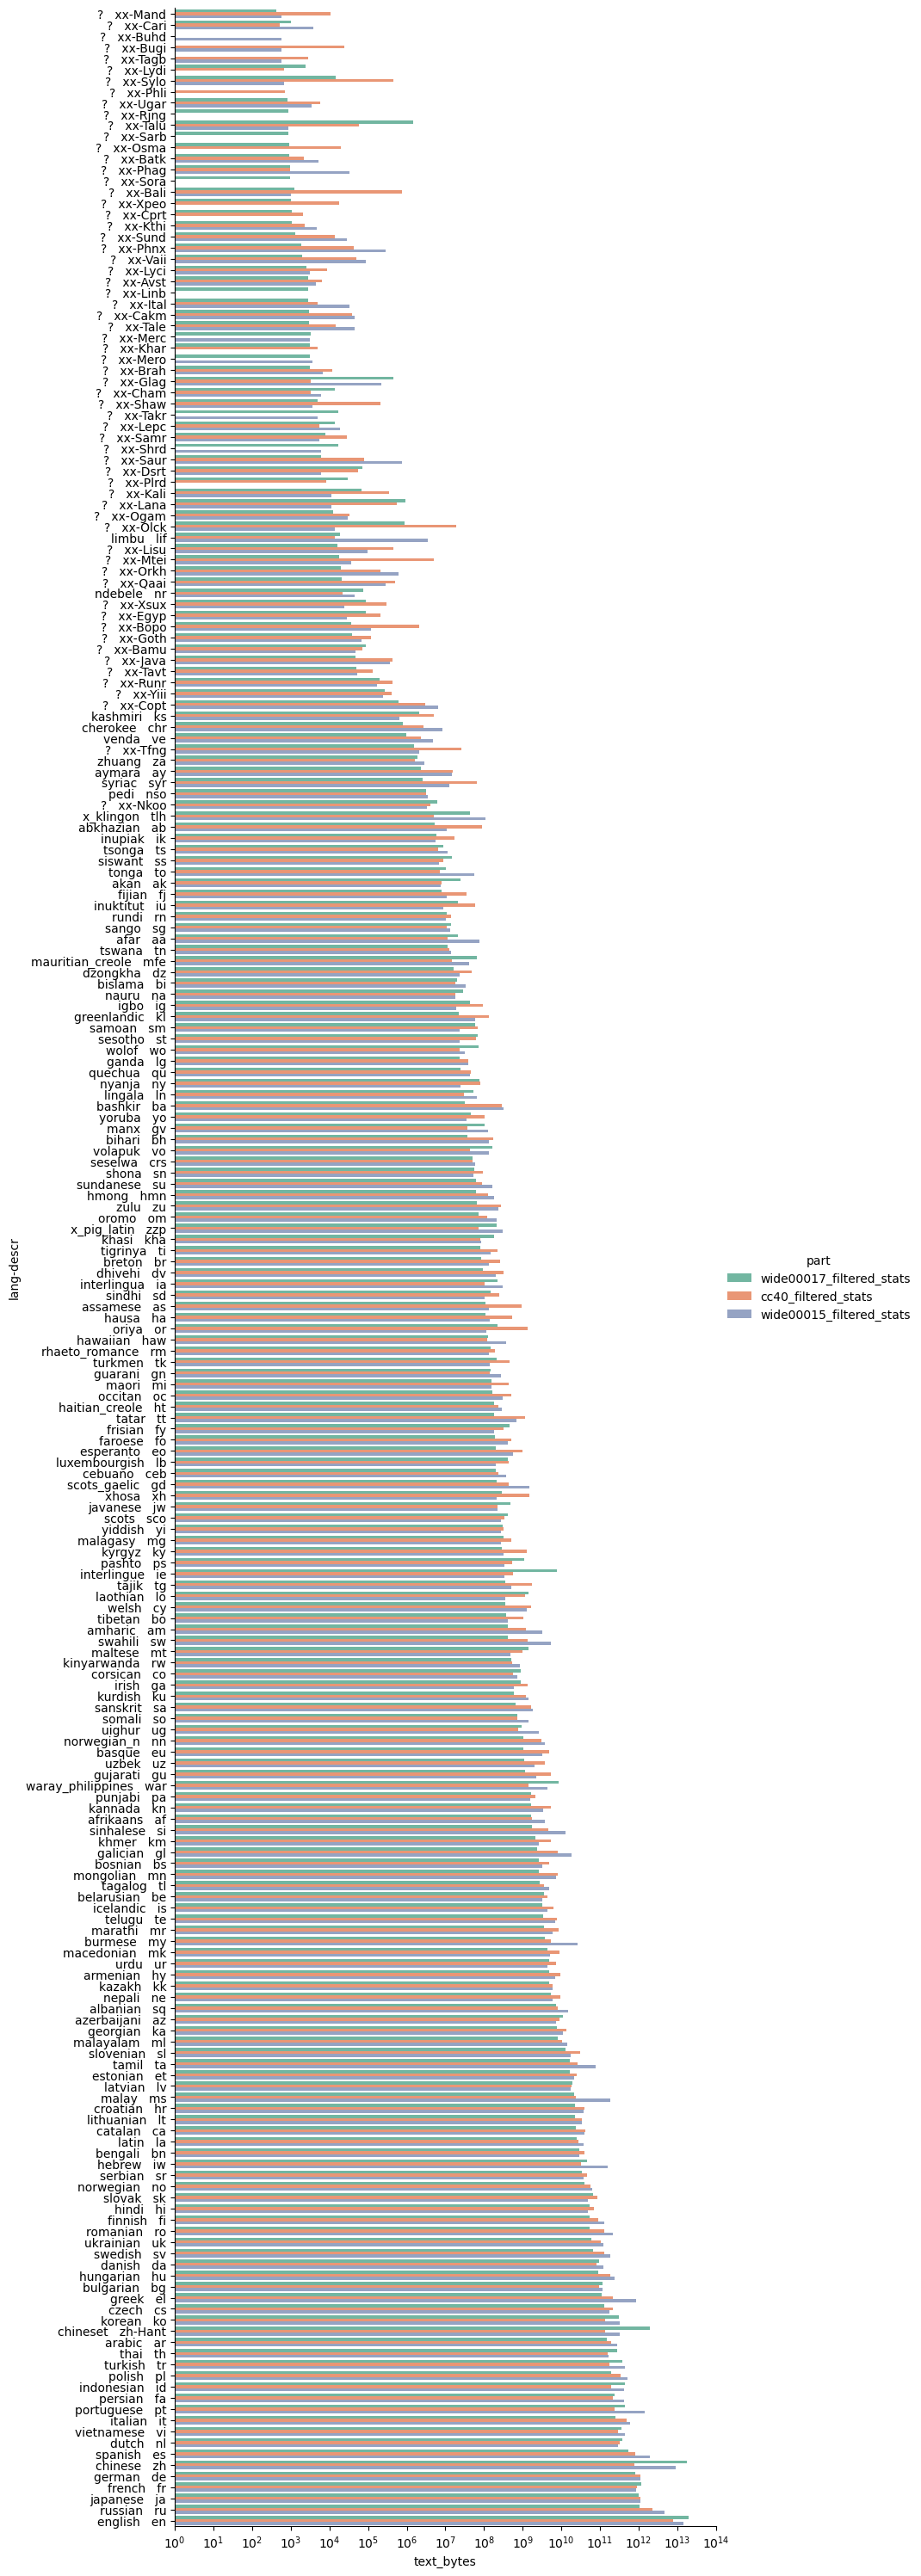

In [8]:
ldf['lang-descr'] = ldf.Name.fillna('?') + '   ' + ldf.lang
ldf=ldf.sort_values(by='text_bytes')    
plot_langs(ldf)

# Plot languages listed in the project proposal

In [9]:
from pathlib import Path
lang2set = [(l,i) for i in range(1,6) for l in pd.read_csv(f'_langs/langs_{i}.txt', header=None)[0] ]

lang2set = pd.DataFrame(lang2set, columns=['lang','set'])
print(len(lang2set))
print(lang2set.set.value_counts())

77
5    31
3    22
4    19
2     4
1     1
Name: set, dtype: int64


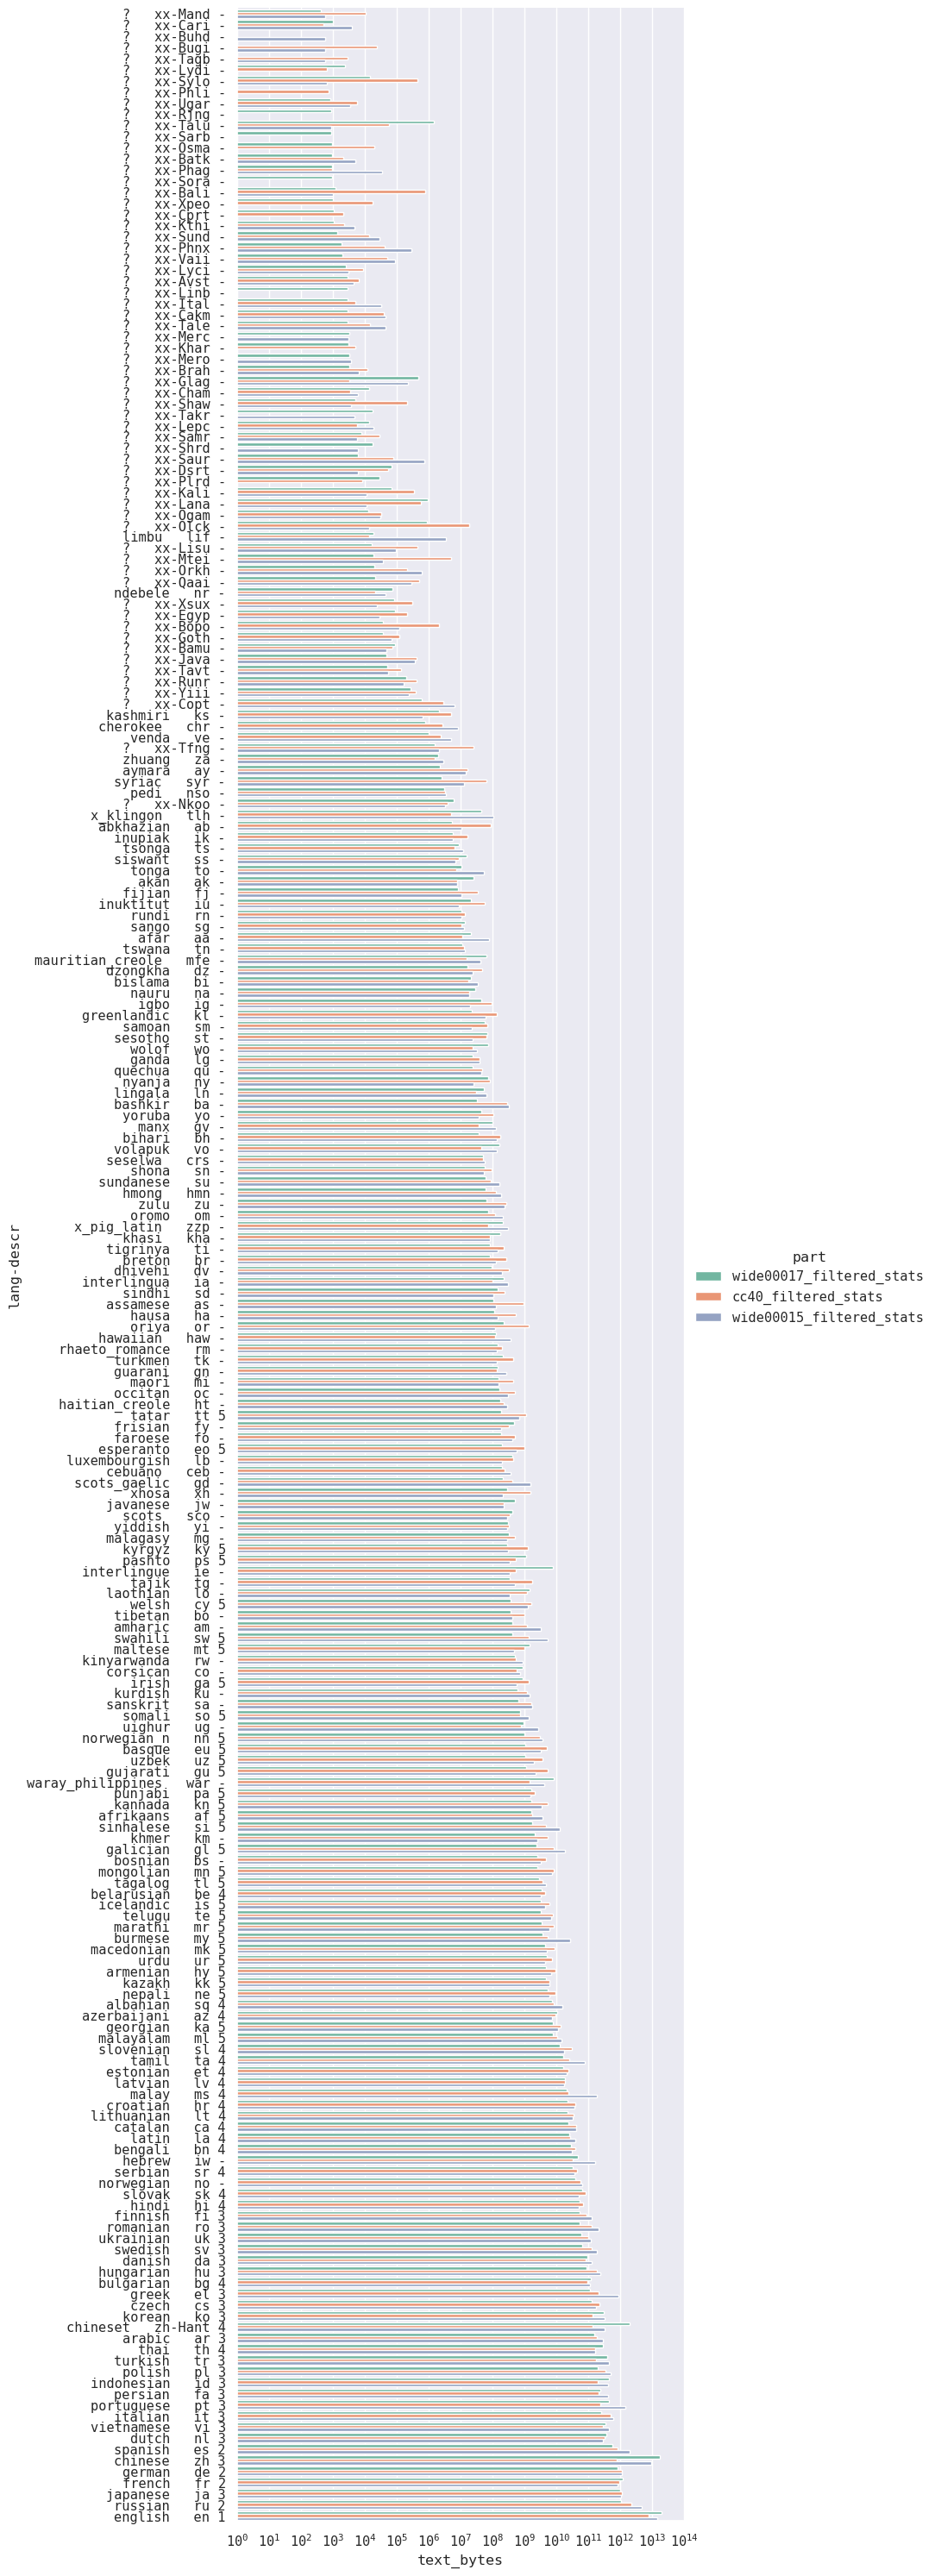

In [10]:
plot_df = ldf.merge(lang2set, on='lang', how='left')
plot_df['lang-descr'] = plot_df.Name.fillna('?') + '   ' + plot_df.lang + ' ' + plot_df.set.apply(lambda r: '-' if pd.isna(r) else str(int(r)))
plot_df = plot_df.fillna(0.0).sort_values(by='text_bytes')
plot_langs(plot_df)

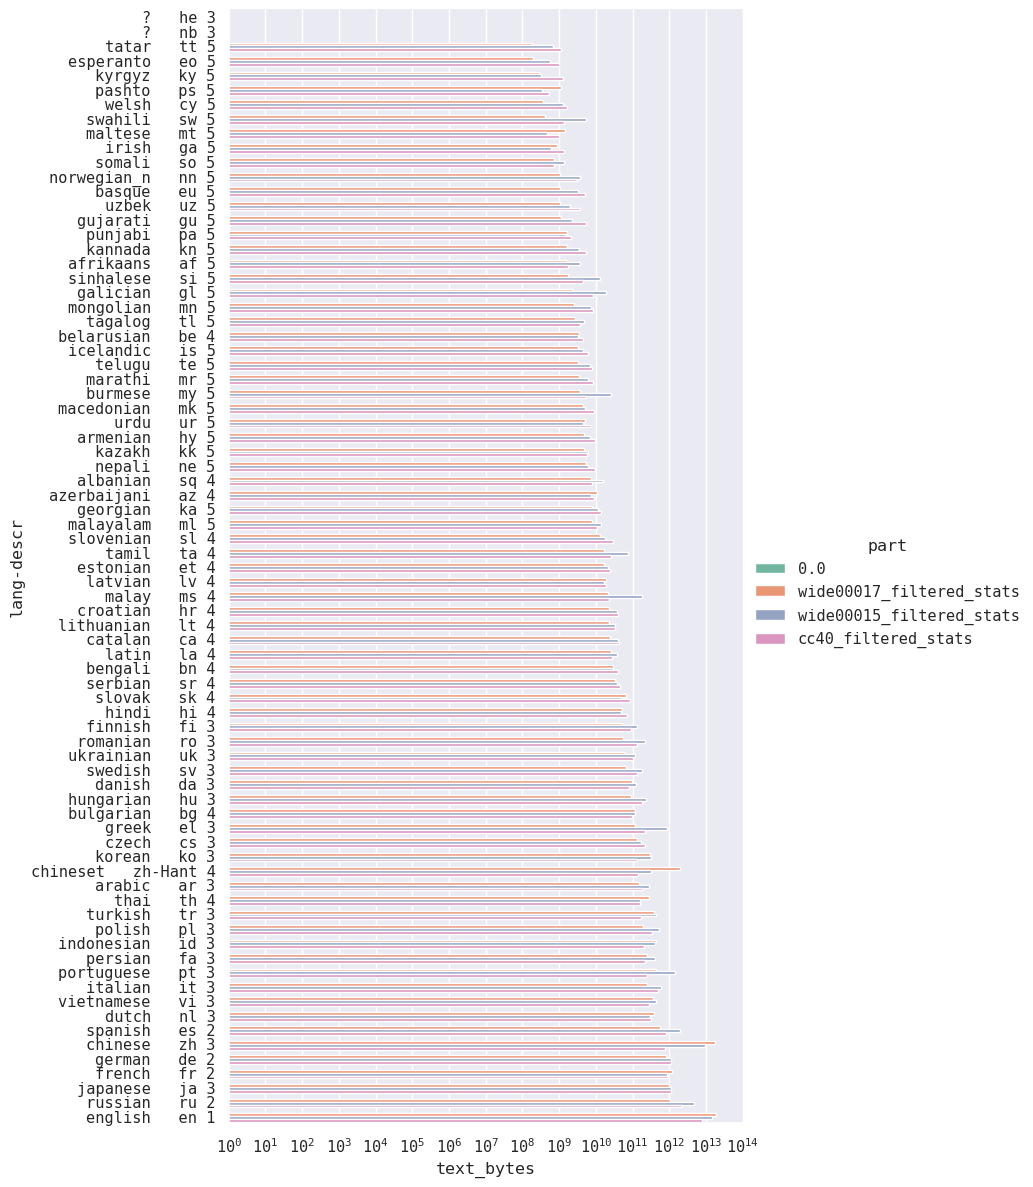

In [11]:
plot_df = ldf.merge(lang2set, on='lang', how='right')
plot_df['lang-descr'] = plot_df.Name.fillna('?') + '   ' + plot_df.lang + ' ' + plot_df.set.astype(str)
plot_df = plot_df.fillna(0.0).sort_values(by='text_bytes')
plot_langs(plot_df, height=12, aspect=0.7)

In [12]:
# he stands for Hebrew
ldf[ldf.Name.str.contains('hebrew').fillna(False)]

,lang,text_newlines,text_wcwords,text_bytes,docs,part,Code,Name,lang-descr
63,iw,560148949,908735542,32860518640,3539103,cc40_filtered_stats,iw,hebrew,hebrew iw
495,iw,1081227042,4744613631,46131686574,5463218,wide00017_filtered_stats,iw,hebrew,hebrew iw
280,iw,2911599978,2319585281,161465723731,8216811,wide00015_filtered_stats,iw,hebrew,hebrew iw


In [13]:
# nb stands for Norwegian (Bokmål)
ldf[ldf.Name.str.contains('norwegian').fillna(False)]

,lang,text_newlines,text_wcwords,text_bytes,docs,part,Code,Name,lang-descr
529,nn,39401284,150905235,1025643543,246884,wide00017_filtered_stats,nn,norwegian_n,norwegian_n nn
97,nn,109918286,402991230,2995985345,581065,cc40_filtered_stats,nn,norwegian_n,norwegian_n nn
314,nn,124496044,554072045,3768153257,533375,wide00015_filtered_stats,nn,norwegian_n,norwegian_n nn
530,no,1727627833,5841600717,40073256568,6348935,wide00017_filtered_stats,no,norwegian,norwegian no
98,no,1646643214,8416419570,57997268232,9891840,cc40_filtered_stats,no,norwegian,norwegian no
315,no,2020019858,9746251443,63442991936,8735018,wide00015_filtered_stats,no,norwegian,norwegian no


In [14]:
lang2set = lang2set.replace({'he':'iw', 'nb':'no'})

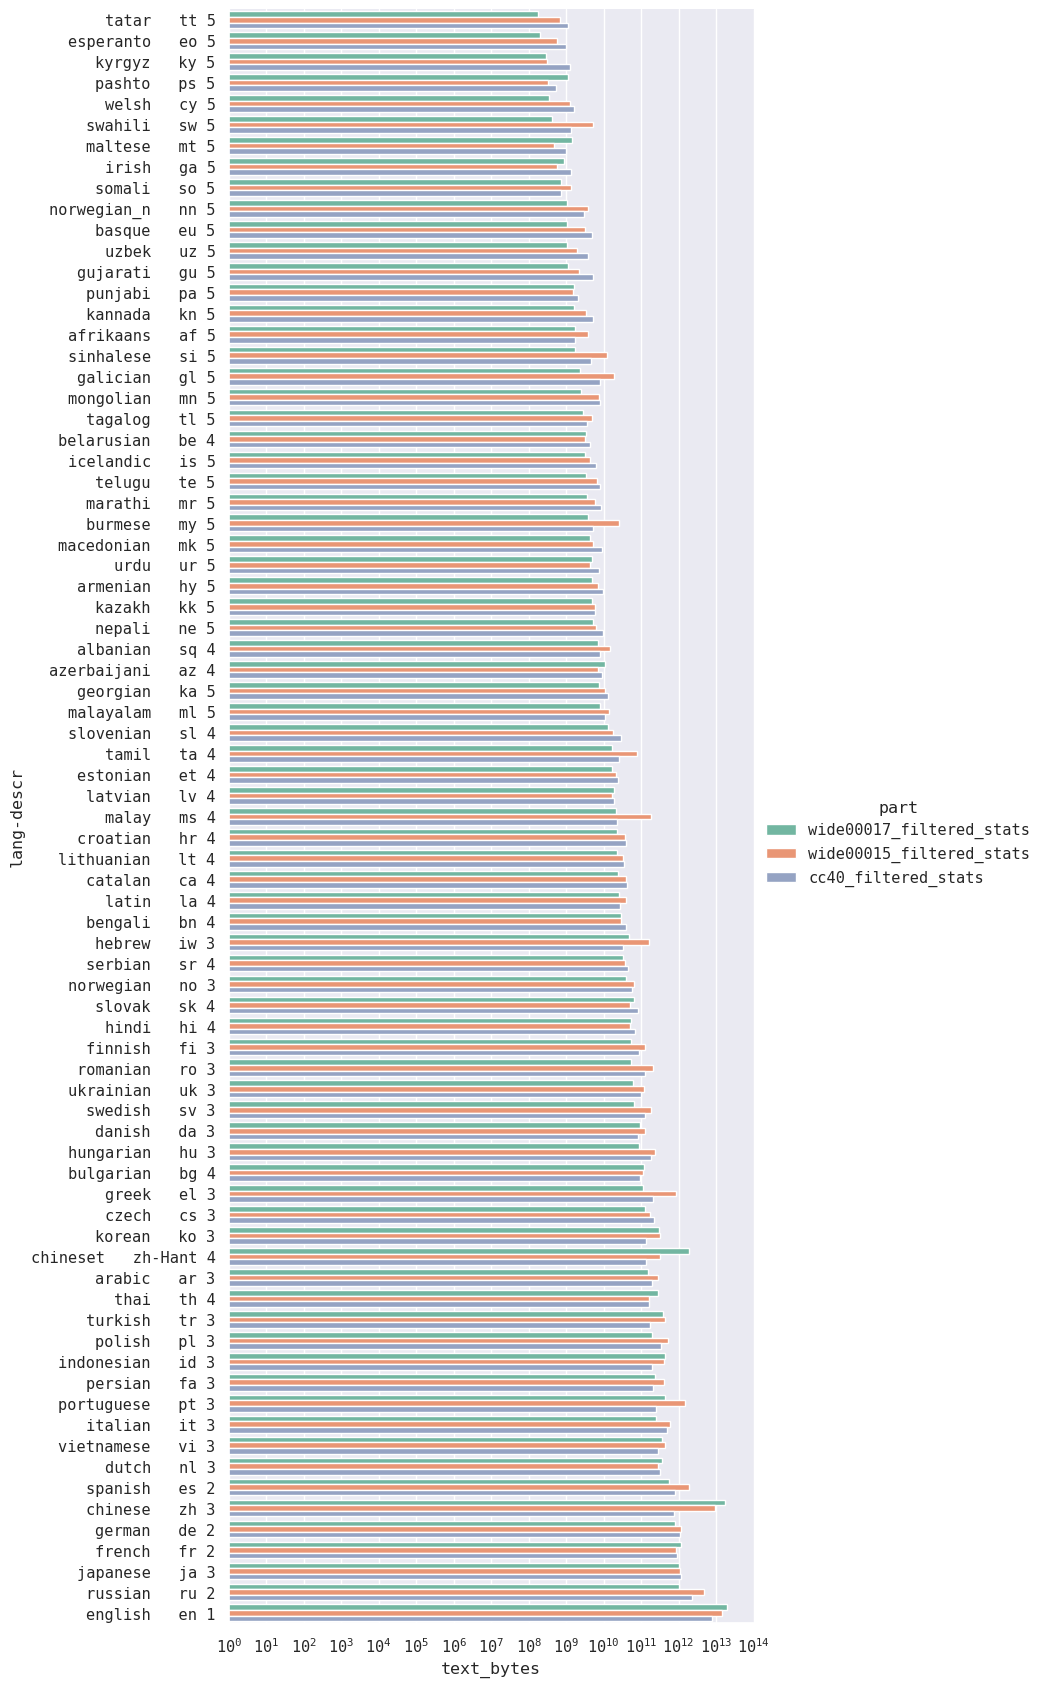

In [23]:
plot_df = ldf.merge(lang2set, on='lang', how='right')
plot_df['lang-descr'] = plot_df.Name.fillna('?') + '   ' + plot_df.lang + ' ' + plot_df.set.astype(str)
plot_df = plot_df.fillna(0.0).sort_values(by='text_bytes')
plot_langs(plot_df, height=17, aspect=0.5)

In [49]:
plot_df.groupby('lang').agg('sum').drop(columns=['set']).describe()

,text_newlines,text_wcwords,text_bytes,docs
count,7.700000e+01,7.700000e+01,7.700000e+01,7.700000e+01
mean,3.516698e+10,1.428331e+11,1.424251e+12,2.373939e+08
std,1.479591e+11,7.154984e+11,5.645762e+12,1.111203e+09
min,2.896672e+07,5.855735e+07,1.742185e+09,1.893750e+05
25%,2.404788e+08,7.547083e+08,1.666146e+10,1.249338e+06
50%,1.968617e+09,7.972934e+09,9.083780e+10,9.773924e+06
75%,1.541694e+10,5.394080e+10,6.012802e+11,5.872313e+07
max,1.184713e+12,6.210393e+12,4.118769e+13,8.357158e+09


In [36]:
plot_df.drop(columns=['set']).groupby('part').describe().transpose()

part                 cc40_filtered_stats  wide00015_filtered_stats  \
text_newlines count         7.700000e+01              7.700000e+01   
              mean          6.049031e+09              1.389784e+10   
              std           2.424182e+10              5.313784e+10   
              min           9.261914e+06              4.144873e+06   
              25%           9.406427e+07              9.307564e+07   
              50%           6.156575e+08              7.026303e+08   
              75%           3.722365e+09              5.740533e+09   
              max           2.076352e+11              4.016597e+11   
text_wcwords  count         7.700000e+01              7.700000e+01   
              mean          2.841704e+10              5.349033e+10   
              std           1.376672e+11              2.541270e+11   
              min           1.087134e+07              6.509550e+06   
              25%           2.177042e+08              2.660567e+08   
              50%           2.332775e+09              2.552436e+09   
              75%           1.108946e+10              2.335119e+10   
              max           1.195445e+12              2.201022e+12   
text_bytes    count         7.700000e+01              7.700000e+01   
              mean          2.570741e+11              5.443446e+11   
              std           9.463076e+11              1.972137e+12   
              min           5.390124e+08              3.131111e+08   
              25%           5.357566e+09              5.097426e+09   
              50%           2.702866e+10              3.308399e+10   
              75%           1.594368e+11              2.317787e+11   
              max           7.904782e+12              1.410263e+13   
docs          count         7.700000e+01              7.700000e+01   
              mean          3.640442e+07              6.648312e+07   
              std           1.513637e+08              2.799051e+08   
              min           7.133200e+04              3.459000e+04   
              25%           5.810650e+05              4.135710e+05   
              50%           3.539103e+06              2.670062e+06   
              75%           1.925805e+07              2.599131e+07   
              max           1.303529e+09              2.213464e+09   

part                 wide00017_filtered_stats  
text_newlines count              7.700000e+01  
              mean               1.522011e+10  
              std                7.336471e+10  
              min                4.469660e+06  
              25%                5.248397e+07  
              50%                6.269566e+08  
              75%                3.468564e+09  
              max                5.754183e+11  
text_wcwords  count              7.700000e+01  
              mean               6.092575e+10  
              std                3.293431e+11  
              min                1.764887e+07  
              25%                2.493541e+08  
              50%                2.424826e+09  
              75%                1.460586e+10  
              max                2.813926e+12  
text_bytes    count              7.700000e+01  
              mean               6.228322e+11  
              std                2.933812e+12  
              min                1.815864e+08  
              25%                2.778526e+09  
              50%                2.156817e+10  
              75%                1.292758e+11  
              max                1.918028e+13  
docs          count              7.700000e+01  
              mean               1.345063e+08  
              std                7.121095e+08  
              min                2.567600e+04  
              25%                2.798960e+05  
              50%                2.836780e+06  
              75%                1.634724e+07  
              max                4.840164e+09

Text(0.5, 1.0, 'Raw text size for languages listed in the proposal')

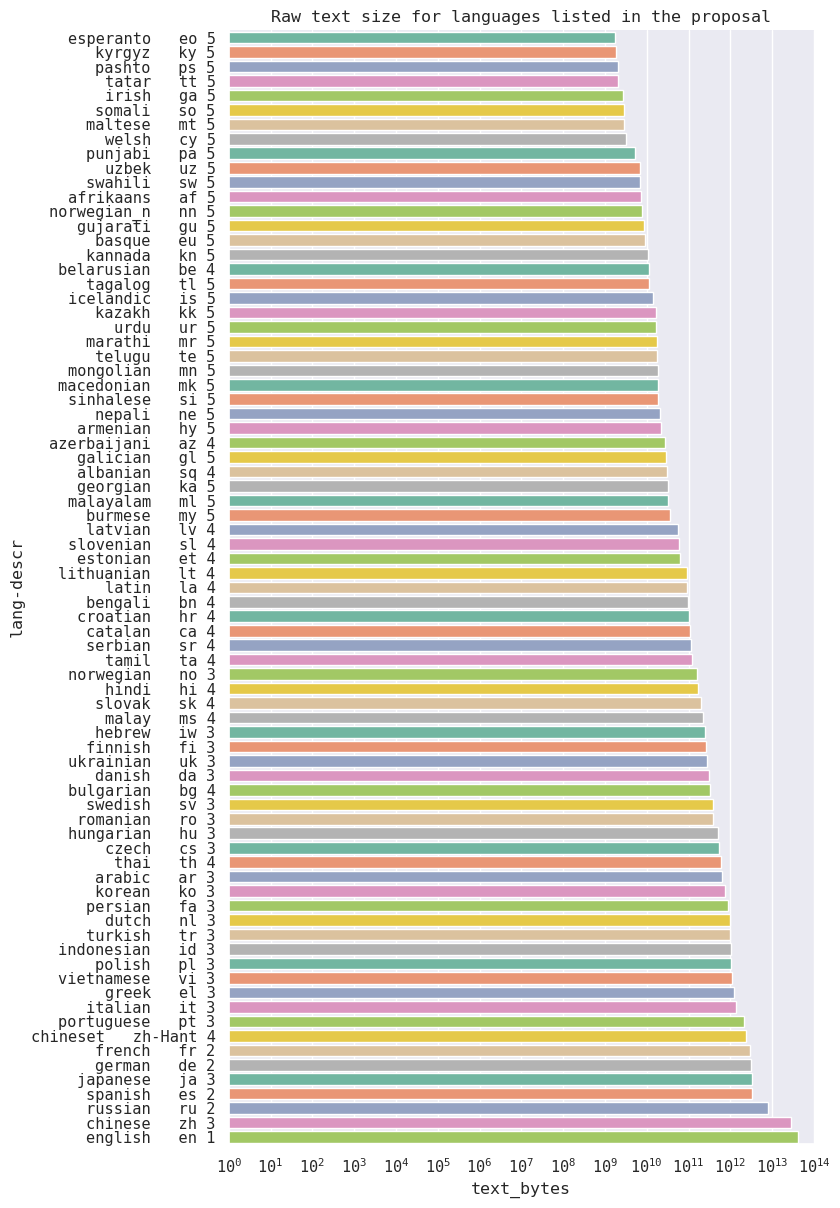

In [17]:
sum_plot_df = plot_df.groupby(['lang','lang-descr']).agg('sum').reset_index().sort_values(by='text_bytes')
plot_langs(sum_plot_df, part_col=None, height=12, aspect=0.7)
plt.title('Raw text size for languages listed in the proposal')

In [18]:
plot_df['text_bytes_prop'] = plot_df.groupby(['lang','lang-descr'])['text_bytes'].transform(lambda r: r/r.sum())

Text(0.5, 1.0, 'Proportions of texts coming from each dataset for the languages listed in the proposal')

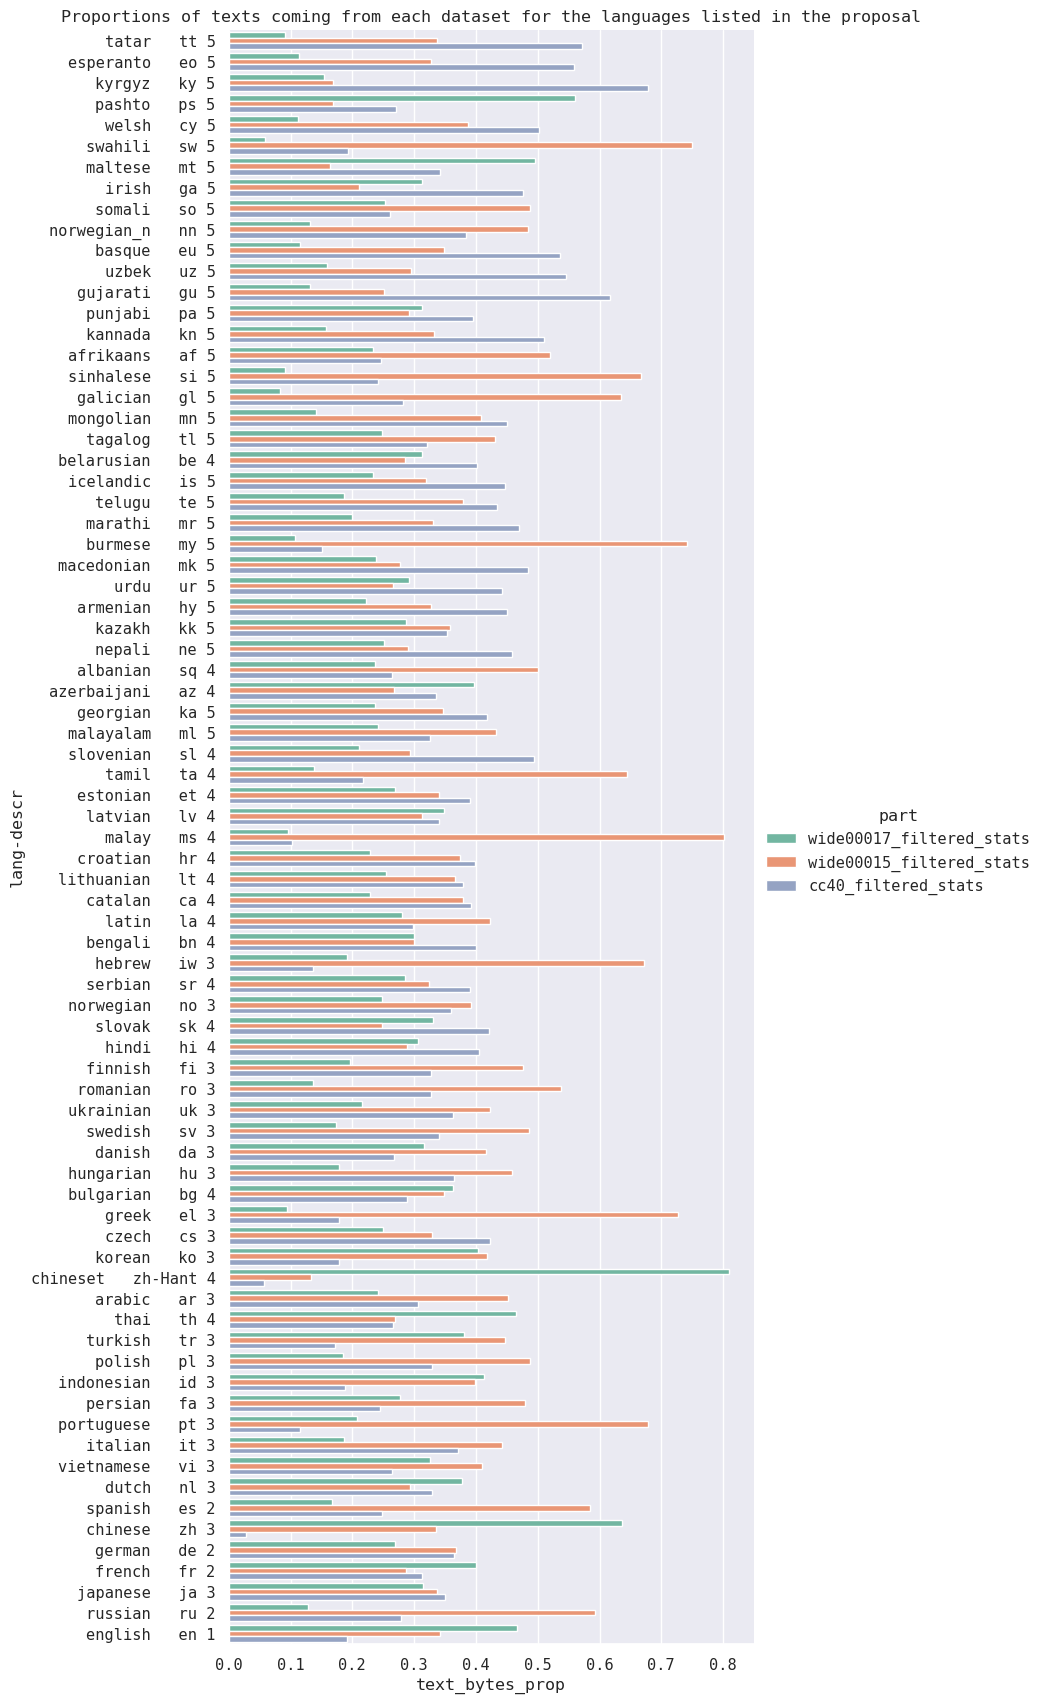

In [19]:
plot_langs(plot_df,stat_col='text_bytes_prop', height=17, aspect=0.5, logscale=False,xticks=None)
plt.title('Proportions of texts coming from each dataset for the languages listed in the proposal')

In [20]:
ldf.groupby('part')['text_bytes'].agg('sum') / 2**40

part
cc40_filtered_stats         18.035444
wide00015_filtered_stats    38.150236
wide00017_filtered_stats    43.648797
Name: text_bytes, dtype: float64

In [21]:
plot_df.groupby('part')['text_bytes'].agg('sum') / 2**40

part
cc40_filtered_stats         18.003182
wide00015_filtered_stats    38.121044
wide00017_filtered_stats    43.617617
Name: text_bytes, dtype: float64